# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Files/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Get the number of rows and columns
no_rows, no_columns = df.shape

# Print out results
print(f"Rows: {no_rows}")
print(f"Columns: {no_columns}")

Rows: 1898
Columns: 9


#### Observations:
The dataset contains 9 columns and 1898 rows

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset primarily has 3 datatypes. Namely Integer, Float and Object

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Check for missing values
missing_values = df.isnull()
print(missing_values)

      order_id  customer_id  restaurant_name  cuisine_type  cost_of_the_order  \
0        False        False            False         False              False   
1        False        False            False         False              False   
2        False        False            False         False              False   
3        False        False            False         False              False   
4        False        False            False         False              False   
...        ...          ...              ...           ...                ...   
1893     False        False            False         False              False   
1894     False        False            False         False              False   
1895     False        False            False         False              False   
1896     False        False            False         False              False   
1897     False        False            False         False              False   

      day_of_the_week  rati

#### Observations:
The False output in each field corresponds to non-missing values. This means the dataset is complete and does not need any further treatment to deal with missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Checking minimum time for food preparation
min_prep_time = df['food_preparation_time'].min()

# Checking average time for food preparation
av_prep_time = df['food_preparation_time'].mean()

# Checking maximum time for food preparation
max_prep_time = df['food_preparation_time'].max()

#Printing out results
print(f'Minimum time taken for food preparation: {min_prep_time}')
print(f'Average time taken for food preparation: {av_prep_time:.2f}')
print(f'Maximum time taken for food preparation: {max_prep_time}')

Minimum time taken for food preparation: 20
Average time taken for food preparation: 27.37
Maximum time taken for food preparation: 35


#### Observations:
The fastest a restaurant has taken to prepare food is 20 minutes, while the slowest being 35 minutes. Normally, a restaurant takes averagely 27 minutes.

### **Question 5:** How many orders are not rated?

In [ ]:
# Counting occurences of unique values of "Not Given" in the rating column
rating_counts = df['rating'].value_counts()

# Getting the number of rows
no_rating = rating_counts.get('Not given', 0)

# Print out results
print(f'Unrated orders are: {no_rating}')

Unrated orders are: 736


#### Observations:
Out of 1898 orders, 736 of them were not rated. The assumption is the rating column accepts the values 1-5 and a Not given value in the case the former is not supplied

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

       order_id customer_id restaurant_name cuisine_type day_of_the_week  \
count      1898        1898            1898         1898            1898   
unique     1898        1200             178           14               2   
top     1477147       52832     Shake Shack     American         Weekend   
freq          1          13             219          584            1351   

           rating  
count        1898  
unique          4  
top     Not given  
freq          736  
       cost_of_the_order  food_preparation_time  delivery_time
count        1898.000000            1898.000000    1898.000000
mean           16.498851              27.371970      24.161749
std             7.483812               4.632481       4.972637
min             4.470000              20.000000      15.000000
25%            12.080000              23.000000      20.000000
50%            14.140000              27.000000      25.000000
75%            22.297500              31.000000      28.000000
max            

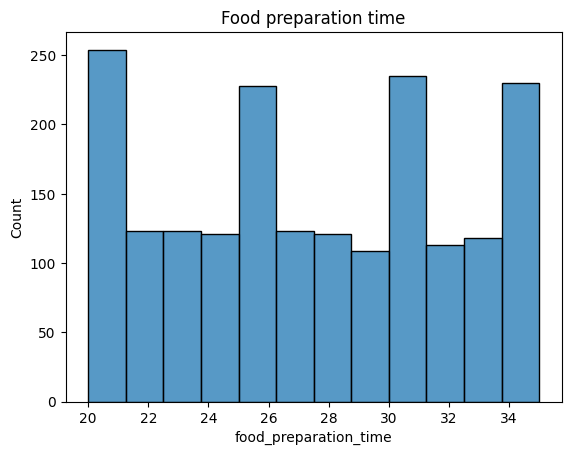

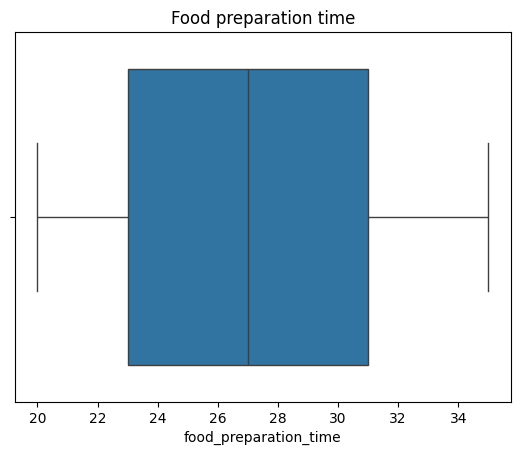

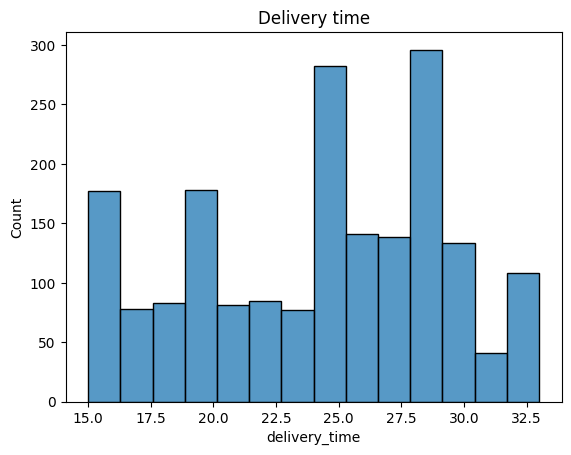

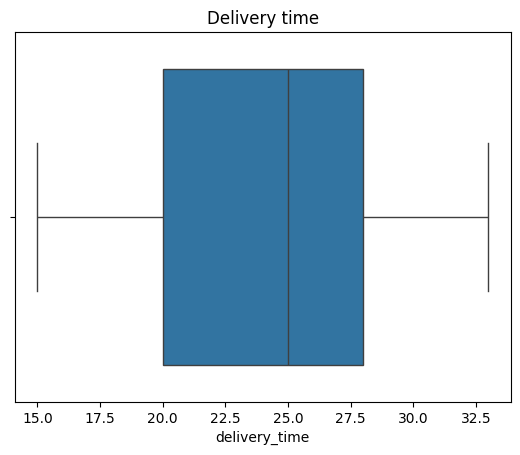

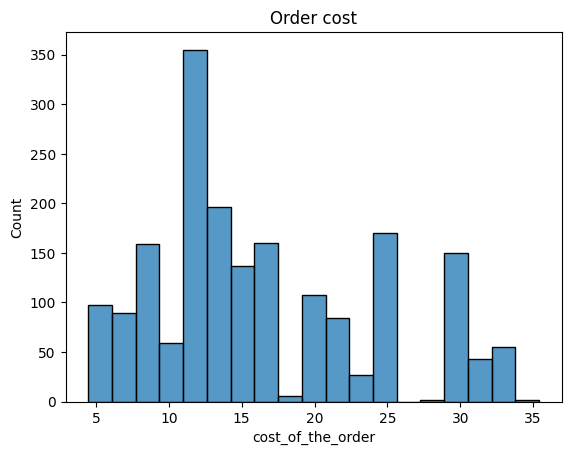

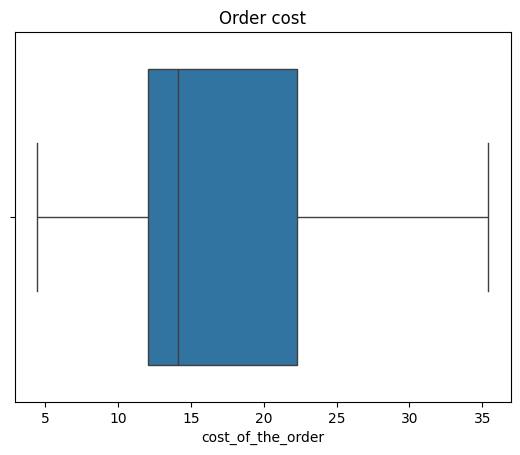

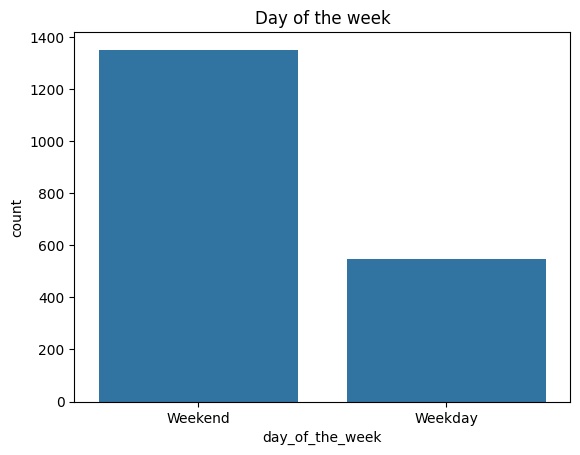

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


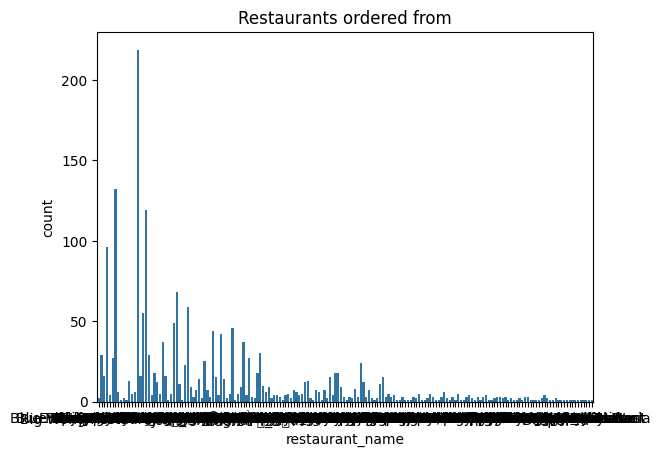

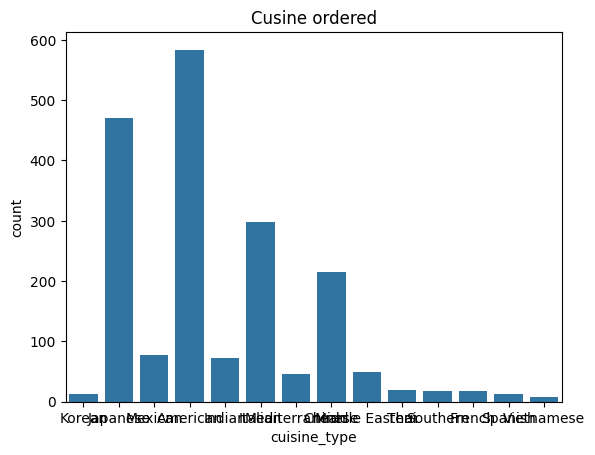

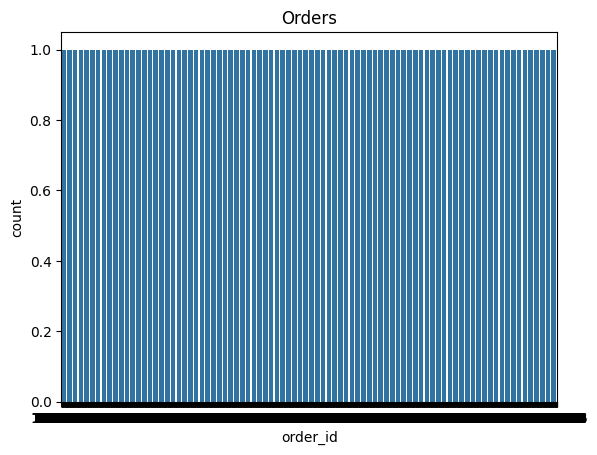

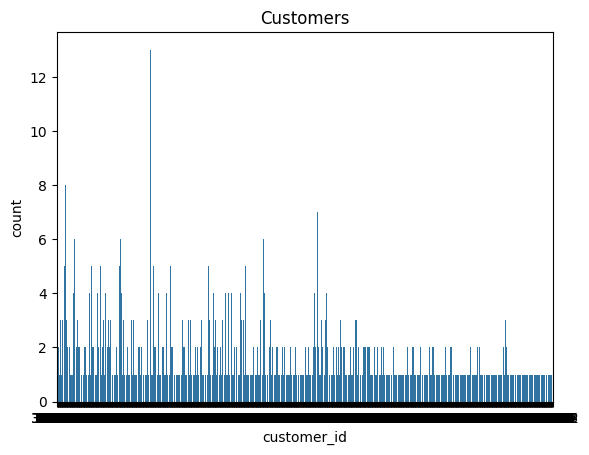

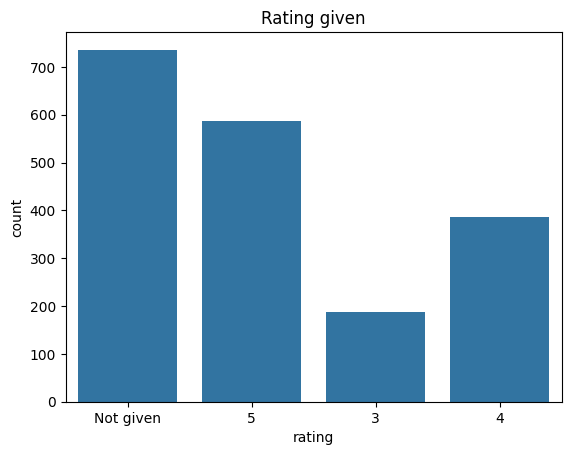

In [ ]:
# Treating order and customer ID as categorical
df['order_id'] = df['order_id'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)

# Describing the categorical variables
print(df.describe(include='O'))

# Describing the numerical variables
print(df.describe())

# Analysis of numerical variables
sns.histplot(x=df['food_preparation_time'])
plt.title('Food preparation time')
plt.show()

sns.boxplot(x=df['food_preparation_time'])
plt.title('Food preparation time')
plt.show()

sns.histplot(x=df['delivery_time'])
plt.title('Delivery time')
plt.show()

sns.boxplot(x=df['delivery_time'])
plt.title('Delivery time')
plt.show()

sns.histplot(x=df['cost_of_the_order'])
plt.title('Order cost')
plt.show()

sns.boxplot(x=df['cost_of_the_order'])
plt.title('Order cost')
plt.show()

# Analysis of categorical variables
sns.countplot(x='day_of_the_week', data=df)
plt.title('Day of the week')
plt.show()

sns.countplot(x='restaurant_name', data=df)
plt.title('Restaurants ordered from')
plt.show()

sns.countplot(x='cuisine_type', data=df)
plt.title('Cusine ordered')
plt.show()

sns.countplot(x='order_id', data=df)
plt.title('Orders')
plt.show()

sns.countplot(x='customer_id', data=df)
plt.title('Customers')
plt.show()

sns.countplot(x='rating', data=df)
plt.title('Rating given')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Count the occurrences of each restaurant
restaurant_count = df['restaurant_name'].value_counts()

# Get the top 5 restaurants
top_5 = restaurant_count.head(5)

# Print the result
print("Top 5 Restaurants Ordered From: ")
print(top_5)

Top 5 Restaurants Ordered From: 
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
The restaurant ordered from the most was Shake Shack, followed by The Meat Ball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and lastly Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Filter rows for weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Count the occurrences of weekend ordered cuisine
cuisine_count = weekend_orders['cuisine_type'].value_counts()

# Get the most ordered food
top_ordered = cuisine_count.idxmax()

# Print the result
print("Most ordered cuisine is: ", top_ordered)

Most ordered cuisine is:  American


#### Observations:
The most ordered cuisine on the weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Percentage of orders that cost more than $20
perc_above_20 = (df['cost_of_the_order'] > 20).mean() * 100

# Print result
print(f"Percentage of orders above $20 is {perc_above_20:.2f}%")

Percentage of orders above $20 is 29.24%


#### Observations:
The percentage of meals that cost more than 20 dollars is 29%. Generally speaking, meals below $20 are 71%

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Getting the mean of order delivery time
av_delivery_time = df['delivery_time'].mean()

# Print results
print(f"Average delivery time is {av_delivery_time:.2f} minutes")


Average delivery time is 24.16 minutes


#### Observations:
It takes roughly 24 minutes for an order to be delivered to a customer

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Count occurence of each customer
count_customer = df['customer_id'].value_counts()

# Get top 3 customers
top_customers = count_customer.head(3)

# Print results
print("Top 3 most frequent customers are:")
print(top_customers)

Top 3 most frequent customers are:
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
The customer with the most orders has ordered from FoodHub 13 times

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<ipython-input-19-7f4acad78d46>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)


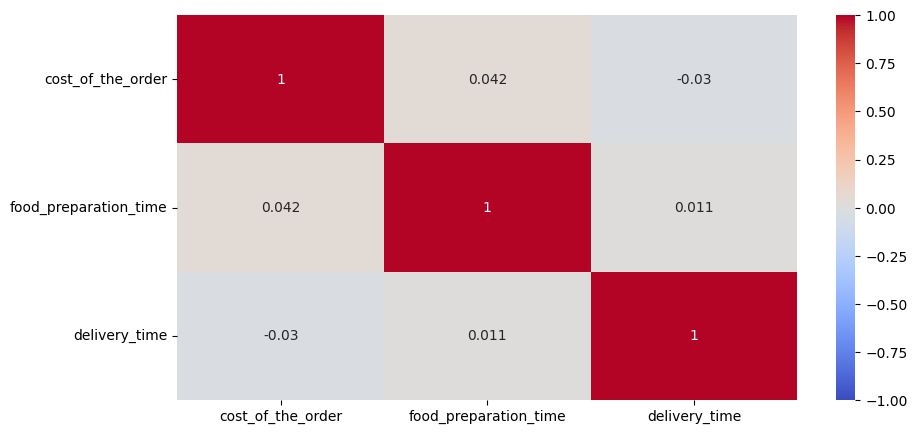

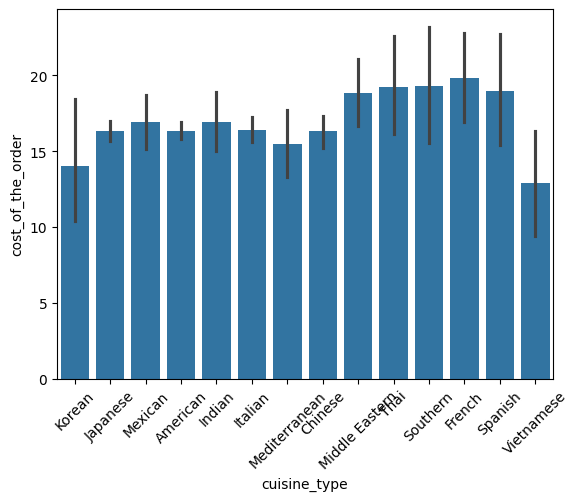

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


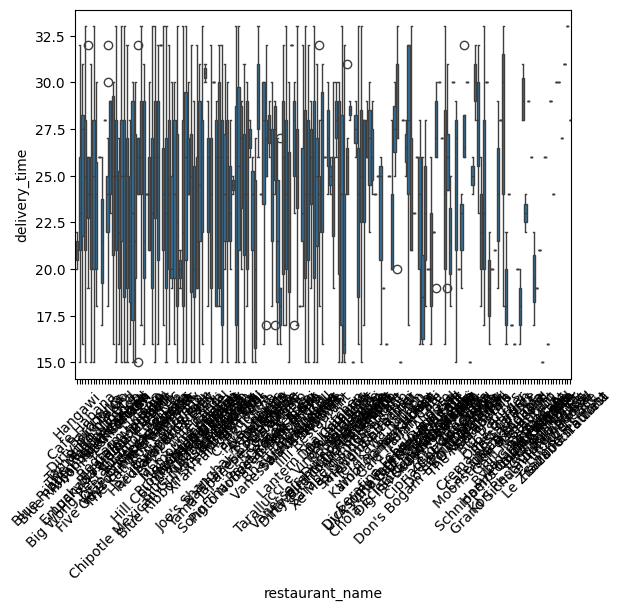

In [19]:
#df.corr()
# Treating order and customer ID as categorical
df['order_id'] = df['order_id'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)

# Correlation of numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

# Barplot to show average cost of order for each cuisine
sns.barplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.show()

# boxplot to compare the delivery time across different restaurants
sns.boxplot(x='restaurant_name', y='delivery_time', data=df)
plt.xticks(rotation=45)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [24]:
# Convert 'rating' column to numeric, treating 'Not given' as NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate count of valid ratings and average rating per restaurant
restaurant_stats = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),  # Count of valid ratings
    average_rating=('rating', 'mean')   # Average of all ratings
)

# Filter the data based on the conditions given
eligible_restaurants = restaurant_stats[(restaurant_stats['rating_count'] > 50) & (restaurant_stats['average_rating'] > 4)]

# Print results
print(eligible_restaurants[['rating_count', 'average_rating']])


                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            64        4.328125
Blue Ribbon Sushi                    73        4.219178
Shake Shack                         133        4.278195
The Meatball Shop                    84        4.511905


#### Observations:
There are only 4 restaurants that are eligible for the promotional offer

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [26]:
# Define the charging percentages
charge_25 = 0.25
charge_15 = 0.15

# Calculate the revenue for each order based on charging percentages
df['revenue'] = df['cost_of_the_order'].apply(lambda cost: cost * charge_25 if cost > 20 else (cost * charge_15 if cost > 5 else 0))

# Calculate the total net revenue
net_revenue = df['revenue'].sum()

# Print the net revenue
print("Net Revenue: $",net_revenue)

Net Revenue: $ 6166.303


#### Observations:
FoodHub made a total of $6166.303 for all the orders made and delivered

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [27]:
# Calculate total time required for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes
above_60_min = (df['total_time'] > 60).mean() * 100

# Print the result
print("The percentage of orders taking more than 60 minutes: {:.2f}%".format(above_60_min))

The percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [29]:
# Categorize weekdays and weekends
df['day_categ'] = df['day_of_the_week'].apply(lambda day: 'Weekend' if day.lower() in ['saturday', 'sunday'] else 'Weekday')

# Calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Print the result
print("Mean delivery time during weekdays:\n", mean_delivery_time['Weekday'])
print("\nMean delivery time during weekends:\n", mean_delivery_time['Weekend'])

Mean delivery time during weekdays:
 28.340036563071298

Mean delivery time during weekends:
 22.4700222057735


#### Observations:
The mean delivery time in the weekend is lower than weekdays

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  
From the analysis above, there are many restaurants that are signed up in FoodHub. However, very few meet the threshold for the company to raise good revenue. It also seems the promotional endevours, such as the advertisement. Since less than 1/4 of the orders were rated, in comparison to the number of restaurants signed up to FoodHub, this cannot generate enough revenue for the company, nor more orders

### Recommendations:

*  Encourage the customers to rate the services in order to get a better oversight on which restaurants are performing better from their angle
*  Offer more cuisine types to expand the market. Or, have more restaurants offering the most popular cuisine in order to expand customer base.

---